Covid-19 Data Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('covid_19_data.csv')

In [4]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
df.rename(columns = {'ObservationDate': 'Date', 'Province/State': 'State', 'Country/Region': 'Country'}, inplace = True)

In [6]:
df.drop(['Last Update', 'SNo'], axis = 1, inplace = True)

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y')

In [10]:
imputer = SimpleImputer(strategy = 'constant') #Fill Nan with 0
df2 = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [11]:
df2.head()

,Date,State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [13]:
df3 = df2.groupby(['Country', 'Date'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [14]:
df3.head()

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,"('St. Martin',)",2020-03-10,2.0,0.0,0.0
2,Afghanistan,2020-02-24,1.0,0.0,0.0
3,Afghanistan,2020-02-25,1.0,0.0,0.0
4,Afghanistan,2020-02-26,1.0,0.0,0.0


In [15]:
countries = df3['Country'].unique()
len(countries)

229

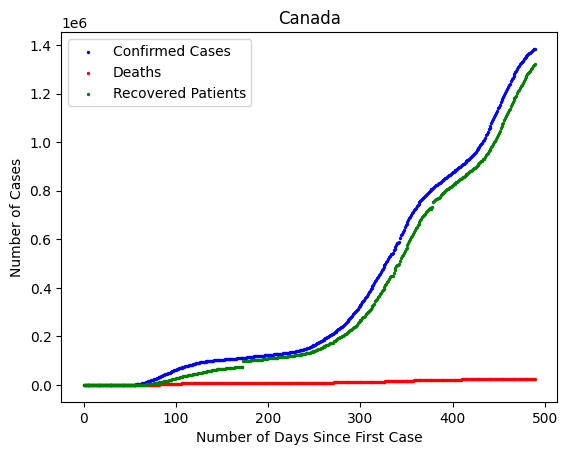

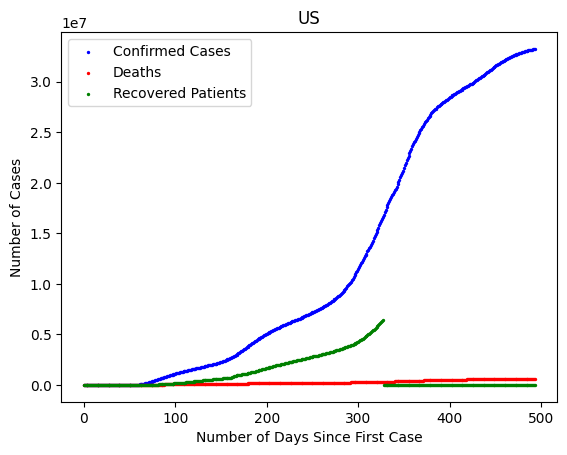

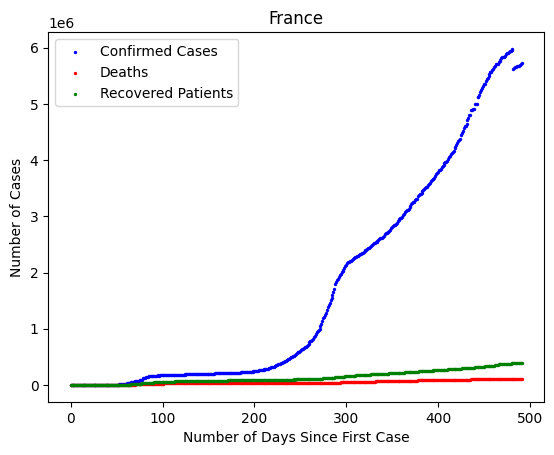

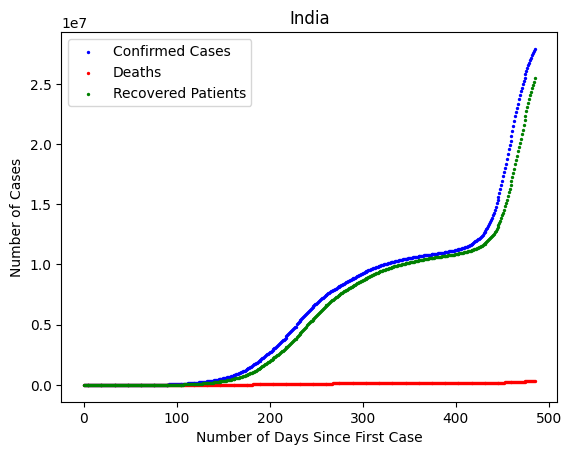

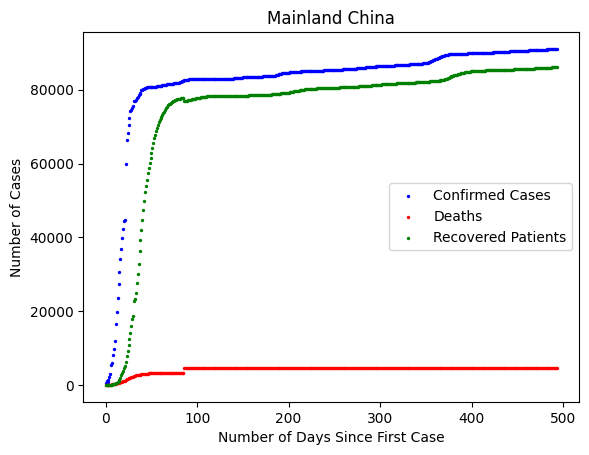

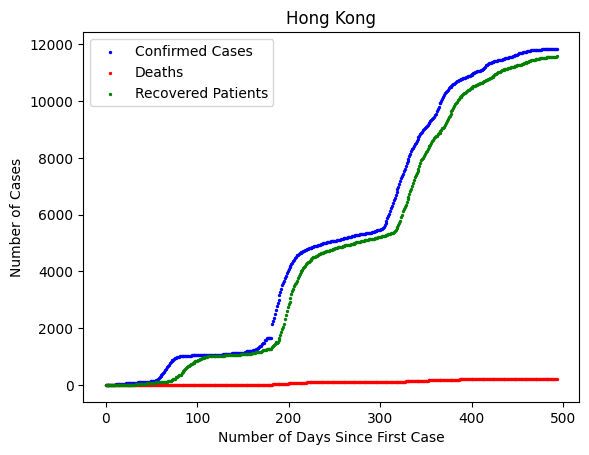

In [21]:
#for index in range(len(countries)): This is for all countries. Try a few
for country in ['Canada', 'US', 'France', 'India', 'Mainland China', 'Hong Kong']:
    C = df3[df3['Country'] == country].reset_index()
    plt.scatter(np.arange(0, len(C)), C['Confirmed'], color = 'blue', label = 'Confirmed Cases', s = 2)
    plt.scatter(np.arange(0, len(C)), C['Deaths'], color = 'red', label = 'Deaths', s = 2)
    plt.scatter(np.arange(0, len(C)), C['Recovered'], color = 'green', label = 'Recovered Patients', s = 2)
    plt.title(country)
    plt.xlabel('Number of Days Since First Case')
    plt.ylabel('Number of Cases')
    plt.legend()
    plt.show()
